In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
penguins_raw = sns.load_dataset('penguins')
penguins_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
species              344 non-null object
island               344 non-null object
bill_length_mm       342 non-null float64
bill_depth_mm        342 non-null float64
flipper_length_mm    342 non-null float64
body_mass_g          342 non-null float64
sex                  333 non-null object
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [3]:
penguins_raw.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
penguins = penguins_raw.dropna()
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
species              333 non-null object
island               333 non-null object
bill_length_mm       333 non-null float64
bill_depth_mm        333 non-null float64
flipper_length_mm    333 non-null float64
body_mass_g          333 non-null float64
sex                  333 non-null object
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [5]:
# Question 2
penguins['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [6]:
# Question 3
penguins['flipper_length_mm'].describe()

count    333.000000
mean     200.966967
std       14.015765
min      172.000000
25%      190.000000
50%      197.000000
75%      213.000000
max      231.000000
Name: flipper_length_mm, dtype: float64

In [7]:
213-190

23

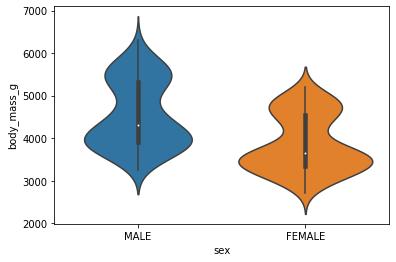

In [8]:
# Question 5
sns.violinplot(data = penguins, x = "sex", y = "body_mass_g")

In [9]:
import scipy.stats as stats

In [10]:
stats.ttest_ind(penguins['body_mass_g'][penguins['sex'] == 'MALE'],
                penguins['body_mass_g'][penguins['sex'] == 'FEMALE'])

Ttest_indResult(statistic=8.541720337994516, pvalue=4.897246751596224e-16)

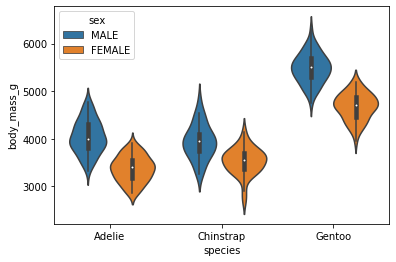

In [11]:
sns.violinplot(y = 'body_mass_g', x = 'species', 
                 data = penguins, 
                 hue = 'sex')

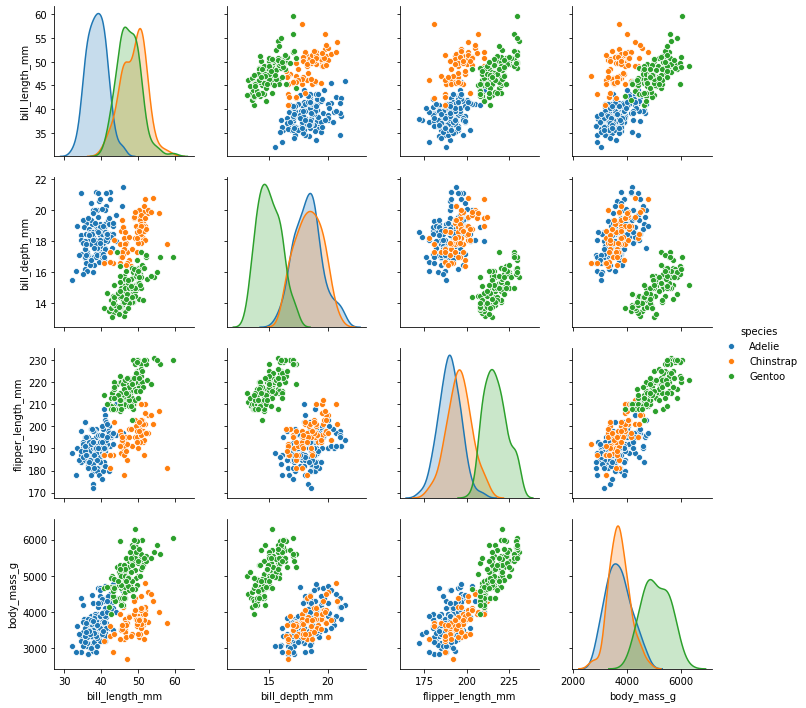

In [12]:
sns.pairplot(data = penguins[list], 
             hue = "species")

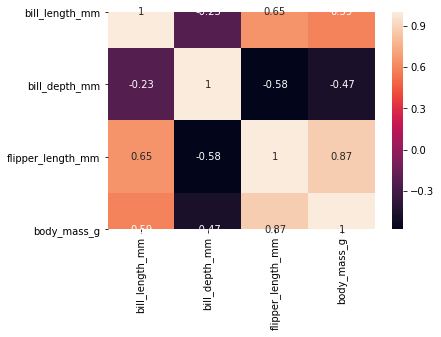

In [13]:
sns.heatmap(penguins.corr(), annot = True)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
X = penguins.filter(['bill_length_mm','bill_depth_mm','flipper_length_mm'])
y = penguins['body_mass_g']

In [16]:
model = LinearRegression().fit(X, y)

In [17]:
model.score(X, y)

0.7639366781169293

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
X = penguins.filter(['bill_length_mm','bill_depth_mm','flipper_length_mm'])
y = penguins['body_mass_g']

In [20]:
model = LogisticRegression().fit(X,y)

C:\Users\roseh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\roseh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [21]:
model.score(X, y)

0.08108108108108109